In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
test = pd.read_csv("Test_OblS0wI.csv")
train = pd.read_csv("Train_VWXNENq.csv")

In [4]:
test

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,FIN1014568,691008,1/1/2009,691601.0,F,5/21/1966,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5041,FIN1014569,691008,1/1/2009,691601.0,M,12/2/1949,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5042,FIN1014570,691008,1/1/2009,691005.0,M,5/20/1977,M,Business,Class XII,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5043,FIN1014571,208001,1/1/2009,208022.0,M,7/22/1985,M,NaN,Graduate,9/25/2008,...,3.0,Probation,M,6/26/1978,4.0,1.0,15347.0,1.0,15347.0,1.0


In [5]:
train

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,FIN1009523,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9523,FIN1009524,848101,7/1/2008,848302.0,M,9/11/1956,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9524,FIN1009525,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0
9525,FIN1009526,575003,7/1/2008,571248.0,M,12/23/1986,S,Salaried,Class XII,6/5/2008,...,Probation,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
data.describe()

NameError: name 'data' is not defined

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

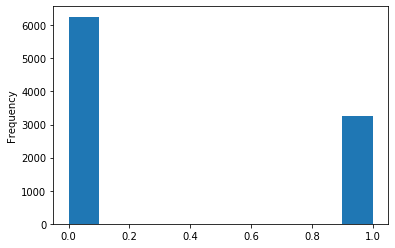

In [8]:
train["Business_Sourced"].plot(kind = "hist")

In [9]:
train.drop(columns = 'ID', inplace = True)

In [10]:
train["Manager_Joining_Designation"].unique()

array(['Level 1', 'Level 2', nan, 'Other', 'Level 3', 'Level 7',
       'Level 5', 'Level 4', 'Level 6'], dtype=object)

In [11]:
train["Manager_Current_Designation"].unique()

array(['Level 2', 'Level 1', 'Level 3', nan, 'Level 4', 'Level 5'],
      dtype=object)

In [12]:
train["Manager_Grade"].unique()

array([ 3.,  2.,  4., nan,  5.,  6.,  1.,  9.,  7.,  8., 10.])

In [13]:
train.drop(columns = ["Applicant_BirthDate", "Manager_DoB"], inplace = True)

In [14]:
acp_mode = train["Applicant_City_PIN"].mode()
acp_mode[0]

202001.0

In [15]:
train["Applicant_City_PIN"].fillna(acp_mode[0], inplace = True)

In [16]:
train["Applicant_City_PIN"].count()

9527

In [17]:
zip_table = train.groupby("Office_PIN").agg({"Business_Sourced" : "median"})

In [18]:
zip_table

,Business_Sourced
Office_PIN,
110005,0
110034,0
121002,0
122002,0
124001,0
...,...
841428,0
842001,0
843302,0


In [19]:
zip_table["zipcode_grp"] = pd.cut(zip_table["Business_Sourced"], bins = 10
                                 , labels = ['Zipcode_grp_0'
                                            , 'Zipcode_grp_1'
                                            , 'Zipcode_grp_2'
                                            , 'Zipcode_grp_3'
                                            , 'Zipcode_grp_4'
                                            , 'Zipcode_grp_5'
                                            , 'Zipcode_grp_6'
                                            , 'Zipcode_grp_7'
                                            , 'Zipcode_grp_8'
                                            , 'Zipcode_grp_9']
                                 , include_lowest = True)

In [20]:
zip_table

,Business_Sourced,zipcode_grp
Office_PIN,,
110005,0,Zipcode_grp_0
110034,0,Zipcode_grp_0
121002,0,Zipcode_grp_0
122002,0,Zipcode_grp_0
124001,0,Zipcode_grp_0
...,...,...
841428,0,Zipcode_grp_0
842001,0,Zipcode_grp_0
843302,0,Zipcode_grp_0


In [21]:
zip_table.drop(columns = "Business_Sourced", inplace = True)

In [22]:
zip_table

,zipcode_grp
Office_PIN,
110005,Zipcode_grp_0
110034,Zipcode_grp_0
121002,Zipcode_grp_0
122002,Zipcode_grp_0
124001,Zipcode_grp_0
...,...
841428,Zipcode_grp_0
842001,Zipcode_grp_0
843302,Zipcode_grp_0


In [23]:
train = pd.merge(train, zip_table, left_on = "Office_PIN", how = "left", right_index = True)

In [24]:
train

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,...,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,zipcode_grp
0,842001,4/16/2007,844120.0,M,M,Others,Graduate,11/10/2005,Level 1,Level 2,...,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0,Zipcode_grp_0
1,842001,4/16/2007,844111.0,M,S,Others,Class XII,11/10/2005,Level 1,Level 2,...,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1,Zipcode_grp_0
2,800001,4/16/2007,844101.0,M,M,Business,Class XII,5/27/2006,Level 1,Level 1,...,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0,Zipcode_grp_0
3,814112,4/16/2007,814112.0,M,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,...,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0,Zipcode_grp_0
4,814112,4/16/2007,815351.0,M,M,Others,Class XII,5/8/2006,Level 1,Level 1,...,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0,Zipcode_grp_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,160017,7/1/2008,160032.0,M,M,Salaried,Graduate,5/5/2008,Level 2,Level 2,...,Probation,M,0.0,0.0,0.0,0.0,0.0,0.0,0,Zipcode_grp_0
9523,848101,7/1/2008,848302.0,M,M,NaN,Graduate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Zipcode_grp_0
9524,753012,7/1/2008,753014.0,F,M,Salaried,Graduate,8/22/2006,Level 2,Level 2,...,Confirmation,M,0.0,0.0,316126.0,9.0,305775.0,8.0,0,Zipcode_grp_0
9525,575003,7/1/2008,571248.0,M,S,Salaried,Class XII,6/5/2008,Level 3,Level 3,...,Probation,M,0.0,0.0,0.0,0.0,0.0,0.0,0,Zipcode_grp_0


In [25]:
zip_table = train.groupby("Applicant_City_PIN").agg({"Business_Sourced" : "median"})

In [26]:
zip_table

,Business_Sourced
Applicant_City_PIN,
110001.0,0.5
110003.0,0.0
110004.0,0.0
110005.0,0.0
110006.0,0.0
...,...
853204.0,0.0
854101.0,1.0
856127.0,1.0


In [27]:
zip_table["zipcode_grp"] = pd.cut(zip_table["Business_Sourced"], bins = 10
                                 , labels = ['Zipcode_grp_0'
                                            , 'Zipcode_grp_1'
                                            , 'Zipcode_grp_2'
                                            , 'Zipcode_grp_3'
                                            , 'Zipcode_grp_4'
                                            , 'Zipcode_grp_5'
                                            , 'Zipcode_grp_6'
                                            , 'Zipcode_grp_7'
                                            , 'Zipcode_grp_8'
                                            , 'Zipcode_grp_9']
                                 , include_lowest = True)

In [28]:
zip_table.drop(columns = "Business_Sourced", inplace = True)
zip_table

,zipcode_grp
Applicant_City_PIN,
110001.0,Zipcode_grp_4
110003.0,Zipcode_grp_0
110004.0,Zipcode_grp_0
110005.0,Zipcode_grp_0
110006.0,Zipcode_grp_0
...,...
853204.0,Zipcode_grp_0
854101.0,Zipcode_grp_9
856127.0,Zipcode_grp_9


In [29]:
train = pd.merge(train, zip_table, left_on = "Applicant_City_PIN", how = "left", right_index = True)

In [30]:
train

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,...,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,zipcode_grp_x,zipcode_grp_y
0,842001,4/16/2007,844120.0,M,M,Others,Graduate,11/10/2005,Level 1,Level 2,...,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0,Zipcode_grp_0,Zipcode_grp_4
1,842001,4/16/2007,844111.0,M,S,Others,Class XII,11/10/2005,Level 1,Level 2,...,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1,Zipcode_grp_0,Zipcode_grp_4
2,800001,4/16/2007,844101.0,M,M,Business,Class XII,5/27/2006,Level 1,Level 1,...,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0,Zipcode_grp_0,Zipcode_grp_0
3,814112,4/16/2007,814112.0,M,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,...,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0,Zipcode_grp_0,Zipcode_grp_0
4,814112,4/16/2007,815351.0,M,M,Others,Class XII,5/8/2006,Level 1,Level 1,...,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0,Zipcode_grp_0,Zipcode_grp_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,160017,7/1/2008,160032.0,M,M,Salaried,Graduate,5/5/2008,Level 2,Level 2,...,M,0.0,0.0,0.0,0.0,0.0,0.0,0,Zipcode_grp_0,Zipcode_grp_0
9523,848101,7/1/2008,848302.0,M,M,NaN,Graduate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Zipcode_grp_0,Zipcode_grp_0
9524,753012,7/1/2008,753014.0,F,M,Salaried,Graduate,8/22/2006,Level 2,Level 2,...,M,0.0,0.0,316126.0,9.0,305775.0,8.0,0,Zipcode_grp_0,Zipcode_grp_0
9525,575003,7/1/2008,571248.0,M,S,Salaried,Class XII,6/5/2008,Level 3,Level 3,...,M,0.0,0.0,0.0,0.0,0.0,0.0,0,Zipcode_grp_0,Zipcode_grp_0


In [31]:
train.drop(columns = ["Office_PIN", "Applicant_City_PIN"], inplace = True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Application_Receipt_Date     9527 non-null   object  
 1   Applicant_Gender             9460 non-null   object  
 2   Applicant_Marital_Status     9454 non-null   object  
 3   Applicant_Occupation         8306 non-null   object  
 4   Applicant_Qualification      9441 non-null   object  
 5   Manager_DOJ                  8844 non-null   object  
 6   Manager_Joining_Designation  8844 non-null   object  
 7   Manager_Current_Designation  8844 non-null   object  
 8   Manager_Grade                8844 non-null   float64 
 9   Manager_Status               8844 non-null   object  
 10  Manager_Gender               8844 non-null   object  
 11  Manager_Num_Application      8844 non-null   float64 
 12  Manager_Num_Coded            8844 non-null   float64 
 13  Man

In [33]:
cat_var = ["Applicant_Gender", "Applicant_Marital_Status", "Applicant_Occupation", "Applicant_Qualification"
          , "Manager_DOJ", "Manager_Joining_Designation", "Manager_Current_Designation", "Manager_Status"
          , "Manager_Gender"]

imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

In [34]:
train[cat_var] = imputer.fit_transform(train[cat_var])

In [35]:
train.drop(columns = ["Manager_Num_Products2", "Manager_Business2"], inplace = True)

In [36]:
num_var = ["Manager_Grade", "Manager_Num_Application", "Manager_Num_Coded", "Manager_Business"
          , "Manager_Num_Products"]

imputer = SimpleImputer(missing_values = np.nan, strategy = "median")

In [37]:
train[num_var] = imputer.fit_transform(train[num_var])

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Application_Receipt_Date     9527 non-null   object  
 1   Applicant_Gender             9527 non-null   object  
 2   Applicant_Marital_Status     9527 non-null   object  
 3   Applicant_Occupation         9527 non-null   object  
 4   Applicant_Qualification      9527 non-null   object  
 5   Manager_DOJ                  9527 non-null   object  
 6   Manager_Joining_Designation  9527 non-null   object  
 7   Manager_Current_Designation  9527 non-null   object  
 8   Manager_Grade                9527 non-null   float64 
 9   Manager_Status               9527 non-null   object  
 10  Manager_Gender               9527 non-null   object  
 11  Manager_Num_Application      9527 non-null   float64 
 12  Manager_Num_Coded            9527 non-null   float64 
 13  Man

In [39]:
train["Application_Receipt_Date"] = pd.to_datetime(train["Application_Receipt_Date"])

In [40]:
train["Manager_DOJ"] = pd.to_datetime(train["Manager_DOJ"])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Application_Receipt_Date     9527 non-null   datetime64[ns]
 1   Applicant_Gender             9527 non-null   object        
 2   Applicant_Marital_Status     9527 non-null   object        
 3   Applicant_Occupation         9527 non-null   object        
 4   Applicant_Qualification      9527 non-null   object        
 5   Manager_DOJ                  9527 non-null   datetime64[ns]
 6   Manager_Joining_Designation  9527 non-null   object        
 7   Manager_Current_Designation  9527 non-null   object        
 8   Manager_Grade                9527 non-null   float64       
 9   Manager_Status               9527 non-null   object        
 10  Manager_Gender               9527 non-null   object        
 11  Manager_Num_Application      9527 non-null 

In [42]:
train["Manager_Joining_Quarter"] = train["Manager_DOJ"].dt.quarter

In [43]:
train["Application_Receipt_Quarter"] = train["Application_Receipt_Date"].dt.quarter

In [44]:
train["Manager_Joining_Year"] = train["Manager_DOJ"].dt.year

In [45]:
train["Application_Receipt_Year"] = train["Application_Receipt_Date"].dt.year

In [46]:
train.drop(columns = ["Application_Receipt_Date", "Manager_DOJ"], inplace = True)

In [47]:
train

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,zipcode_grp_x,zipcode_grp_y,Manager_Joining_Quarter,Application_Receipt_Quarter,Manager_Joining_Year,Application_Receipt_Year
0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,0,Zipcode_grp_0,Zipcode_grp_4,4,2,2005,2007
1,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,1,Zipcode_grp_0,Zipcode_grp_4,4,2,2005,2007
2,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,0,Zipcode_grp_0,Zipcode_grp_0,2,2,2006,2007
3,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,0,Zipcode_grp_0,Zipcode_grp_0,3,2,2003,2007
4,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,0,Zipcode_grp_0,Zipcode_grp_0,2,2,2006,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,M,M,Salaried,Graduate,Level 2,Level 2,3.0,Probation,M,0.0,0.0,0.0,0.0,0,Zipcode_grp_0,Zipcode_grp_0,2,3,2008,2008
9523,M,M,Salaried,Graduate,Level 1,Level 2,3.0,Confirmation,M,1.0,0.0,102178.0,5.0,0,Zipcode_grp_0,Zipcode_grp_0,3,3,2007,2008
9524,F,M,Salaried,Graduate,Level 2,Level 2,3.0,Confirmation,M,0.0,0.0,316126.0,9.0,0,Zipcode_grp_0,Zipcode_grp_0,3,3,2006,2008
9525,M,S,Salaried,Class XII,Level 3,Level 3,4.0,Probation,M,0.0,0.0,0.0,0.0,0,Zipcode_grp_0,Zipcode_grp_0,2,3,2008,2008


In [48]:
train["Applicant_Gender"] = train["Applicant_Gender"].map({"M":0, "F":1})

In [49]:
designation = {"Other":0, "Level 1":1, "Level 2":2, "Level 3":3, "Level 4":4, "Level 5":5, "Level 6":6
              , "Level 7":7}

train["Manager_Joining_Designation"] = train["Manager_Joining_Designation"].map(designation)
train["Manager_Current_Designation"] = train["Manager_Current_Designation"].map(designation)

In [50]:
train["Manager_Status"].unique()

array(['Confirmation', 'Probation'], dtype=object)

In [51]:
train["Manager_Status"] = train["Manager_Status"].map({"Confirmation":0, "Probation":1})

In [52]:
train["Manager_Gender"].unique()

array(['M', 'F'], dtype=object)

In [53]:
train["Manager_Gender"] = train["Manager_Gender"].map({"M":0, "F":1})

In [54]:
train

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,zipcode_grp_x,zipcode_grp_y,Manager_Joining_Quarter,Application_Receipt_Quarter,Manager_Joining_Year,Application_Receipt_Year
0,0,M,Others,Graduate,1,2,3.0,0,0,2.0,1.0,335249.0,28.0,0,Zipcode_grp_0,Zipcode_grp_4,4,2,2005,2007
1,0,S,Others,Class XII,1,2,3.0,0,0,2.0,1.0,335249.0,28.0,1,Zipcode_grp_0,Zipcode_grp_4,4,2,2005,2007
2,0,M,Business,Class XII,1,1,2.0,0,0,0.0,0.0,357184.0,24.0,0,Zipcode_grp_0,Zipcode_grp_0,2,2,2006,2007
3,0,S,Salaried,Class XII,1,3,4.0,0,1,0.0,0.0,318356.0,22.0,0,Zipcode_grp_0,Zipcode_grp_0,3,2,2003,2007
4,0,M,Others,Class XII,1,1,2.0,0,0,2.0,1.0,230402.0,17.0,0,Zipcode_grp_0,Zipcode_grp_0,2,2,2006,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,0,M,Salaried,Graduate,2,2,3.0,1,0,0.0,0.0,0.0,0.0,0,Zipcode_grp_0,Zipcode_grp_0,2,3,2008,2008
9523,0,M,Salaried,Graduate,1,2,3.0,0,0,1.0,0.0,102178.0,5.0,0,Zipcode_grp_0,Zipcode_grp_0,3,3,2007,2008
9524,1,M,Salaried,Graduate,2,2,3.0,0,0,0.0,0.0,316126.0,9.0,0,Zipcode_grp_0,Zipcode_grp_0,3,3,2006,2008
9525,0,S,Salaried,Class XII,3,3,4.0,1,0,0.0,0.0,0.0,0.0,0,Zipcode_grp_0,Zipcode_grp_0,2,3,2008,2008


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Applicant_Gender             9527 non-null   int64   
 1   Applicant_Marital_Status     9527 non-null   object  
 2   Applicant_Occupation         9527 non-null   object  
 3   Applicant_Qualification      9527 non-null   object  
 4   Manager_Joining_Designation  9527 non-null   int64   
 5   Manager_Current_Designation  9527 non-null   int64   
 6   Manager_Grade                9527 non-null   float64 
 7   Manager_Status               9527 non-null   int64   
 8   Manager_Gender               9527 non-null   int64   
 9   Manager_Num_Application      9527 non-null   float64 
 10  Manager_Num_Coded            9527 non-null   float64 
 11  Manager_Business             9527 non-null   float64 
 12  Manager_Num_Products         9527 non-null   float64 
 13  Bus

In [56]:
train = pd.get_dummies(train, columns = ["Applicant_Marital_Status", "Applicant_Occupation", "Applicant_Qualification"]
                      , drop_first = True)

In [57]:
train

,Applicant_Gender,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,...,Applicant_Qualification_Associate/Fellow of Acturial Society of India,Applicant_Qualification_Associate/Fellow of Institute of Company Secretories of India,Applicant_Qualification_Associate/Fellow of Insurance Institute of India,Applicant_Qualification_Certified Associateship of Indian Institute of Bankers,Applicant_Qualification_Class X,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Masters of Business Administration,Applicant_Qualification_Others,Applicant_Qualification_Professional Qualification in Marketing
0,0,1,2,3.0,0,0,2.0,1.0,335249.0,28.0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,2,3.0,0,0,2.0,1.0,335249.0,28.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,2.0,0,0,0.0,0.0,357184.0,24.0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,3,4.0,0,1,0.0,0.0,318356.0,22.0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,2.0,0,0,2.0,1.0,230402.0,17.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,0,2,2,3.0,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
9523,0,1,2,3.0,0,0,1.0,0.0,102178.0,5.0,...,0,0,0,0,0,0,1,0,0,0
9524,1,2,2,3.0,0,0,0.0,0.0,316126.0,9.0,...,0,0,0,0,0,0,1,0,0,0
9525,0,3,3,4.0,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 34 columns):
 #   Column                                                                                 Non-Null Count  Dtype   
---  ------                                                                                 --------------  -----   
 0   Applicant_Gender                                                                       9527 non-null   int64   
 1   Manager_Joining_Designation                                                            9527 non-null   int64   
 2   Manager_Current_Designation                                                            9527 non-null   int64   
 3   Manager_Grade                                                                          9527 non-null   float64 
 4   Manager_Status                                                                         9527 non-null   int64   
 5   Manager_Gender                                                       

In [59]:
train["zipcode_grp_x"] = train["zipcode_grp_x"].astype("category").cat.codes

In [60]:
train["zipcode_grp_x"].unique()

array([0, 9], dtype=int8)

In [61]:
train["zipcode_grp_y"] = train["zipcode_grp_y"].astype("category").cat.codes

In [62]:
train["zipcode_grp_y"].unique()

array([4, 0, 9], dtype=int8)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 34 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Applicant_Gender                                                                       9527 non-null   int64  
 1   Manager_Joining_Designation                                                            9527 non-null   int64  
 2   Manager_Current_Designation                                                            9527 non-null   int64  
 3   Manager_Grade                                                                          9527 non-null   float64
 4   Manager_Status                                                                         9527 non-null   int64  
 5   Manager_Gender                                                              

In [64]:
train.to_csv("train_processed.csv", index = False)